In [ ]:
# # suraskite, ar yra koreliacija tarp šių parametrų - ridos, kainos, automobilio amžiaus, variklio tūrio.
#  Vizualizuokite tai su heatmap. Su histograma atvaizduokite automobilių amžiaus pasiskirstymą. 
# ar yra priklausomybė tarp butų amžiaus ir kainos? Tarp butų kambarių kiekio ir kainos? Panaudokite heatmap.
#  Su histograma atvaizduokite butų plotų pasiskirstymą. 
#

In [2]:
import pandas as pd
import sqlite3


csv_file_path = '../../data/atlyginimai.csv'
df_atlyginimai = pd.read_csv(csv_file_path)

print("Atlyginimai DataFrame:")
print(df_atlyginimai.head())

Atlyginimai DataFrame:
               Sav. Bruto, EUR Pokytis proc. per metus Neto, EUR  \
0       Šalies ūkis    2 000,1                    12,3   1 241,2   
1   Akmenės r. sav.    1 758,8                      14   1 111,9   
2   Alytaus m. sav.    1 685,4                    10,5   1 073,7   
3   Alytaus r. sav.    1 528,5                     8,6     991,9   
4  Anykščių r. sav.    1 537,7                    11,5     996,7   

  Pokytis proc. per metus.1  
0                      11,2  
1                      12,7  
2                       9,9  
3                       8,6  
4                      10,9  


In [14]:
db_file_path = r'C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\cars1.db'
conn = sqlite3.connect(db_file_path)


df_cars = pd.read_sql_query("select * from car_listings", conn)

print("Cars DataFrame:")
print(df_cars.head())

conn.close()

Cars DataFrame:
        brand             model     price               seller  \
0         BMW    428 Gran Coupe  18 000 €  Privatus pardavėjas   
1         BMW               530  26 900 €  Privatus pardavėjas   
2  Volkswagen              Golf   7 100 €  Privatus pardavėjas   
3        Fiat              500X  10 500 €  Privatus pardavėjas   
4         BMW  320 Gran Turismo  14 500 €  Privatus pardavėjas   

             location         phone registration_year     mileage  \
0   Klaipėda, Lietuva  +37068744028              2015  199 000 km   
1   Klaipėda, Lietuva  +37067780732              2019   46 000 km   
2     Alytus, Lietuva  +37068875994           2014-03  314 086 km   
3     Kaunas, Lietuva  +37068731000              2016  126 211 km   
4  Kėdainiai, Lietuva  +37064227171           2016-06  162 000 km   

                     engine         fuel_type                body_type doors  \
0  1997 cm³, 245 AG (180kW)          Benzinas             Kupė (Coupe)   4/5   
1  1998 cm³,

In [33]:
import numpy as np

df_cars['mileage_clean'] = df_cars['mileage'].str.replace(' km', '').str.replace(' ', '')
df_cars['mileage_clean'] = pd.to_numeric(df_cars['mileage_clean'], errors='coerce').astype(float)
df_cars['price_clean'] = df_cars['price'].str.replace(' €', '').str.replace(' ', '').astype(float)
df_cars['engine_clean'] = df_cars['engine'].str.extract(r'(\d+)\s*AG')[0].astype(float)

current_year = pd.Timestamp.now().year
df_cars['registration_year_clean'] = pd.to_numeric(df_cars['registration_year'].astype(str).str[:4], errors='coerce')
df_cars['car_age'] = current_year - df_cars['registration_year_clean']
print(df_cars.head())

        brand             model     price               seller  \
0         BMW    428 Gran Coupe  18 000 €  Privatus pardavėjas   
1         BMW               530  26 900 €  Privatus pardavėjas   
2  Volkswagen              Golf   7 100 €  Privatus pardavėjas   
3        Fiat              500X  10 500 €  Privatus pardavėjas   
4         BMW  320 Gran Turismo  14 500 €  Privatus pardavėjas   

             location         phone registration_year     mileage  \
0   Klaipėda, Lietuva  +37068744028              2015  199 000 km   
1   Klaipėda, Lietuva  +37067780732              2019   46 000 km   
2     Alytus, Lietuva  +37068875994           2014-03  314 086 km   
3     Kaunas, Lietuva  +37068731000              2016  126 211 km   
4  Kėdainiai, Lietuva  +37064227171           2016-06  162 000 km   

                     engine         fuel_type  ...              color  \
0  1997 cm³, 245 AG (180kW)          Benzinas  ...              Balta   
1  1998 cm³, 252 AG (185kW)          Benzi

In [32]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand                    6193 non-null   object 
 1   model                    6193 non-null   object 
 2   price                    6193 non-null   object 
 3   seller                   6193 non-null   object 
 4   location                 6193 non-null   object 
 5   phone                    6193 non-null   object 
 6   registration_year        6193 non-null   object 
 7   mileage                  6193 non-null   object 
 8   engine                   6193 non-null   object 
 9   fuel_type                6193 non-null   object 
 10  body_type                6193 non-null   object 
 11  doors                    6193 non-null   object 
 12  transmission             6193 non-null   object 
 13  color                    6193 non-null   object 
 14  tech_check              

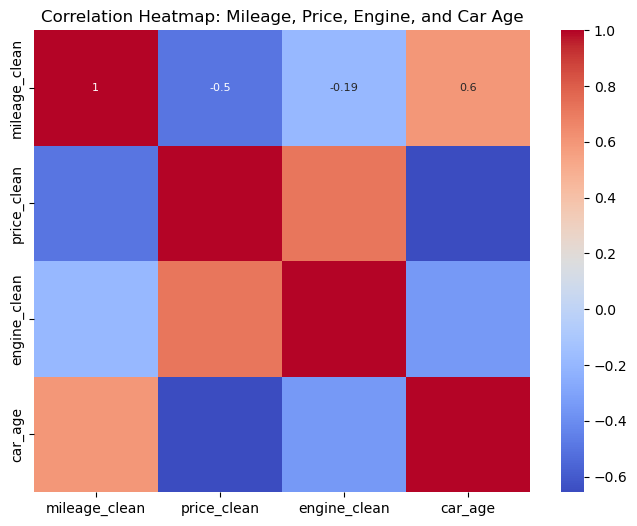

c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


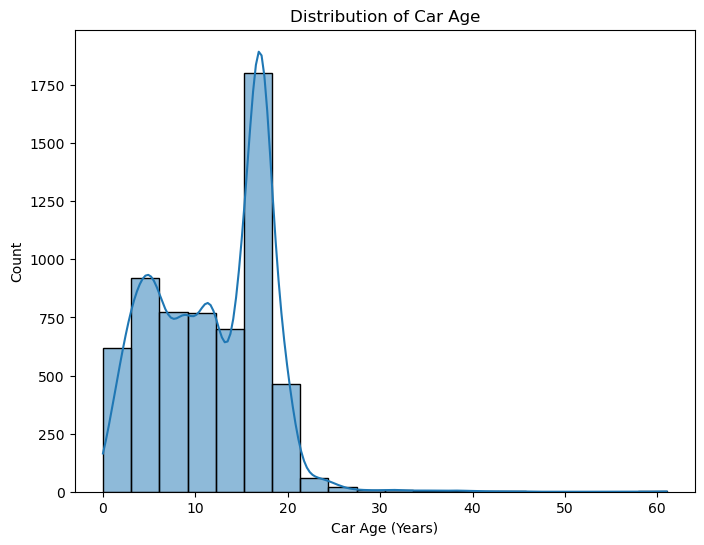

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df_cars[['mileage_clean', 'price_clean', 'engine_clean', 'car_age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True, annot_kws={'fontsize':8})
plt.title('Correlation Heatmap: Mileage, Price, Engine, and Car Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_cars['car_age'] , bins=20, kde=True)
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Count')
plt.show()


In [ ]:
# ar yra priklausomybė tarp butų amžiaus ir kainos? Tarp butų kambarių kiekio ir kainos? Panaudokite heatmap.
#  Su histograma atvaizduokite butų plotų pasiskirstymą.

In [46]:
db_file_path = r'C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\aruodas.db'
conn = sqlite3.connect(db_file_path)


df_restate = pd.read_sql_query("select * from listings", conn)

print("Cars DataFrame:")
print(df_restate.head())

conn.close()

Cars DataFrame:
   id                                            address      price  \
0   1    Vilnius, Šnipiškės, Verkių g., 2 kambarių butas  205 000 €   
1   2          Palanga, Prieplaukos g., 2 kambarių butas  250 000 €   
2   3  Palanga, Palanga, A. Mickevičiaus g., 2 kambar...  268 000 €   
3   4  Vilnius, Pašilaičiai, Perkūnkiemio g., 3 kamba...  163 000 €   
4   5  Vilnius, Fabijoniškės, Vėtrungių g., 2 kambari...  131 000 €   

  namo_numeris buto_numeris    plotas  kambariu_sk  aukstas  aukstu_sk metai  \
0           5A           55  66,64 m²            2        3          5  2003   
1           14           11  49,36 m²            2        1          2  2020   
2          N/A          N/A     35 m²            2        1          3  2023   
3           53          N/A     67 m²            3        8         12  2008   
4           83          N/A     50 m²            2       12         12  2005   

  pastato_tipas                sildymas irengimas energijos_klase  
0       

In [53]:
df_restate['price_clean'] = df_restate['price'].str.replace(' €', '').str.replace(' ', '').astype(float)
df_restate['metai'] = df_restate['metai'].replace('N/A', np.nan).dropna()
df_restate['metai'] = df_restate['metai'].astype(float)
df_restate['age'] = current_year - df_restate['metai']
print(df_restate.head())

   id                                            address      price  \
0   1    Vilnius, Šnipiškės, Verkių g., 2 kambarių butas  205 000 €   
1   2          Palanga, Prieplaukos g., 2 kambarių butas  250 000 €   
2   3  Palanga, Palanga, A. Mickevičiaus g., 2 kambar...  268 000 €   
3   4  Vilnius, Pašilaičiai, Perkūnkiemio g., 3 kamba...  163 000 €   
4   5  Vilnius, Fabijoniškės, Vėtrungių g., 2 kambari...  131 000 €   

  namo_numeris buto_numeris    plotas  kambariu_sk  aukstas  aukstu_sk  \
0           5A           55  66,64 m²            2        3          5   
1           14           11  49,36 m²            2        1          2   
2          N/A          N/A     35 m²            2        1          3   
3           53          N/A     67 m²            3        8         12   
4           83          N/A     50 m²            2       12         12   

    metai pastato_tipas                sildymas irengimas energijos_klase  \
0  2003.0       Mūrinis               Centrinis  Įr

In [42]:
df_restate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5000 non-null   int64  
 1   address          5000 non-null   object 
 2   price            5000 non-null   object 
 3   namo_numeris     5000 non-null   object 
 4   buto_numeris     5000 non-null   object 
 5   plotas           5000 non-null   object 
 6   kambariu_sk      5000 non-null   int64  
 7   aukstas          5000 non-null   int64  
 8   aukstu_sk        5000 non-null   int64  
 9   metai            0 non-null      float64
 10  pastato_tipas    5000 non-null   object 
 11  sildymas         5000 non-null   object 
 12  irengimas        5000 non-null   object 
 13  energijos_klase  5000 non-null   object 
 14  price_clean      5000 non-null   float64
 15  age              0 non-null      float64
dtypes: float64(3), int64(4), object(9)
memory usage: 625.1+ KB


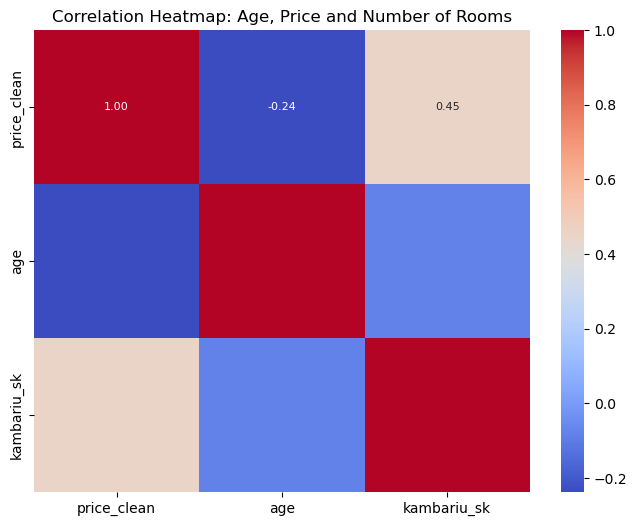

In [64]:
correlation1 = df_restate[['price_clean', 'age', 'kambariu_sk']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation1, annot=True, cmap='coolwarm', cbar=True, annot_kws={'fontsize':8}, fmt=".2f")
plt.title('Correlation Heatmap: Age, Price and Number of Rooms')
plt.show()

c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


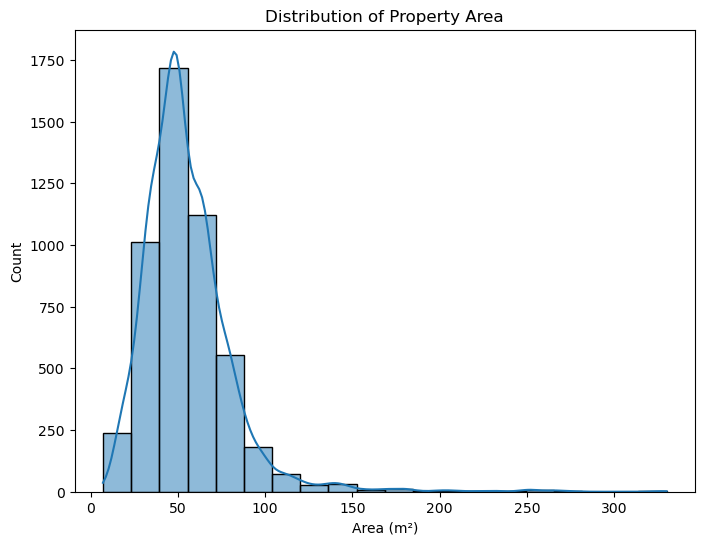

In [56]:
df_restate['plotas'] = df_restate['plotas'].astype(str).str.replace(' m²', '').str.replace(',', '.').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(df_restate['plotas'], bins=20, kde=True)
plt.title('Distribution of Property Area')
plt.xlabel('Area (m²)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Note - su histograma - paeksperimentuokite su binwidth parametru, su bins parametru 
# - bins parametras nurodo, kiek intervalų norite turėti - skaičius čia.

#Atvaizduokite top3 gamintojų skelbimų ir ridų kainų pasiskirstymą su histograma.
#  Panaudokite hue raktažodį bei multipla raktažodį, išbandykite multiple raktažodžio galimas reikšmes. 
# Kuris histogramos variantas yra infromatyviausias?

Cars DataFrame:
        brand  num_listings  avg_price  avg_mileage
0         BMW          1037  12.811958   254.064609
1  Volkswagen           814  18.517199   279.449631
2      Toyota           678  13.328909   214.923304


c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


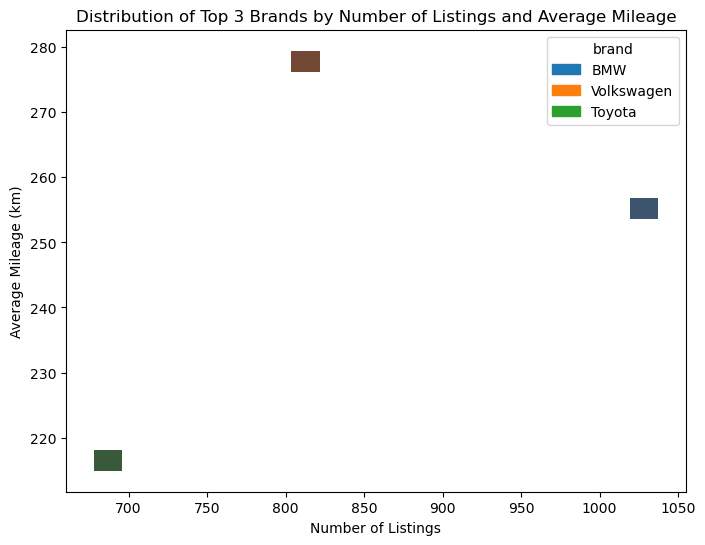

c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Batia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


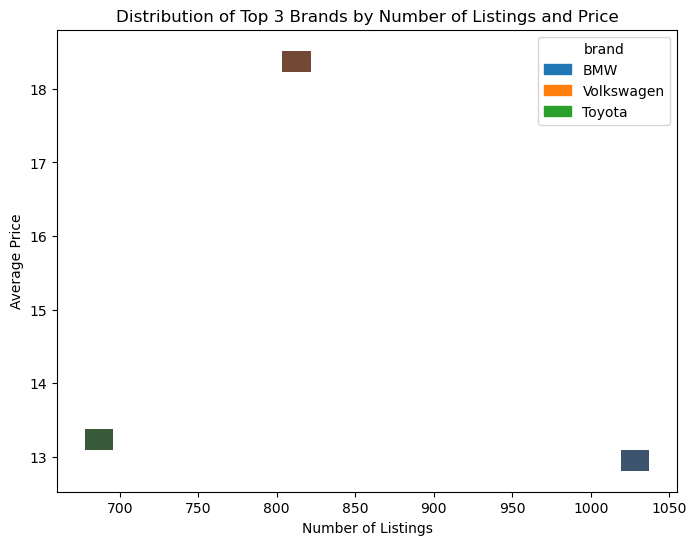

In [81]:
db_file_path = r'C:\Users\Batia\Desktop\DataScienceNotebooks\Studentai\Vladimir\cars1.db'
conn = sqlite3.connect(db_file_path)

df_cars = pd.read_sql_query("select brand, count(*) as num_listings, avg(price) as avg_price, avg(mileage) as avg_mileage from car_listings group by brand order by num_listings desc limit 3;", conn)

print("Cars DataFrame:")
print(df_cars.head())

conn.close()

plt.figure(figsize=(8, 6))
sns.histplot(x = df_cars['num_listings'],y = df_cars['avg_mileage'], bins=20, kde=True, hue=df_cars['brand'], multiple='stack')
plt.title('Distribution of Top 3 Brands by Number of Listings and Average Mileage')
plt.xlabel('Number of Listings')
plt.ylabel('Average Mileage (km)')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(x = df_cars['num_listings'], y = df_cars['avg_price'], bins=20, kde=True, hue=df_cars['brand'], multiple='dodge')
plt.title('Distribution of Top 3 Brands by Number of Listings and Price')
plt.xlabel('Number of Listings')
plt.ylabel('Average Price')
plt.show()


In [ ]:
#Išanalizuokite elektromobilių pasiūlą - ridos, amžiaus, baterijos talpos, nuvažiuojamo atstumo įtaką kainai, 
# raskite ir vizualizuokite koreliacijų tarp šių parametrų dydžius. Panaudokite heatmap, pairplot, histplot.

In [ ]:
# 